# Predict delivery time using sorting time

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('delivery_time.csv')
data 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Data Preprocessing

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [18]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [19]:
data.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x22e23af8df0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e23b083d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e23af8b50>,
 'medians': [<matplotlib.lines.Line2D at 0x22e23b08850>,
 'fliers': [<matplotlib.lines.Line2D at 0x22e23b08b20>,
 'means': []}

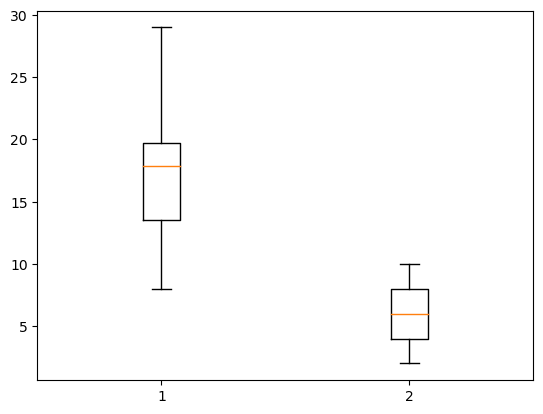

In [20]:
plt.boxplot(data)

C:\Users\Rachita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

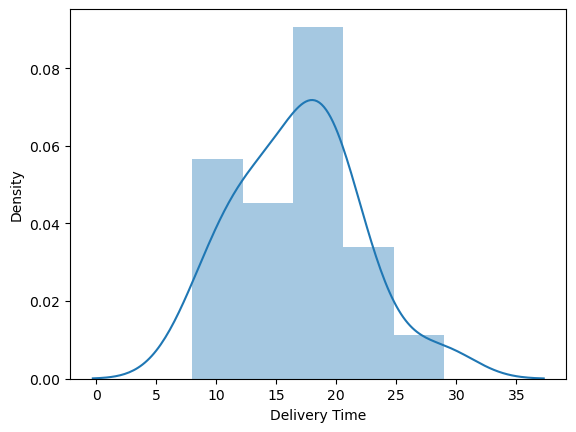

In [21]:
sns.distplot(data['Delivery Time'])

# Data Normalization

In [22]:
scaler= MinMaxScaler()
col = ['Delivery Time','Sorting Time']
data[col] = scaler.fit_transform(data[col])
data

,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


# Model Building

In [23]:
lr = LinearRegression()
X = data.drop('Sorting Time',axis=1)
y=data['Sorting Time']
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)
model = lr.fit(Xtrain,ytrain)

Train Accuracy

In [34]:
ypred = model.predict(Xtrain)
ypred

array([0.42880967, 0.21305535, 0.8345216 , 0.08407178, 0.35376469,
       0.24823268, 0.63518337, 0.58828025, 0.71726382, 1.06903717,
       0.49119081, 0.15442645, 0.63893562, 0.27309133, 0.54512939,
       0.60000603])

In [35]:
accuracy = r2_score(ytrain,ypred)
accuracy*100

75.95469743943434

Test Accuracy

In [38]:
ypred = model.predict(Xtest)
ypred

array([0.69381226, 0.55826226, 0.4067652 , 0.34203891, 0.54841261])

In [39]:
accuracy = r2_score(ytest,ypred)
accuracy*100

40.41199604717838